In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

df=pd.read_csv('HW2_house-prices.csv')
df_notdigit=df.select_dtypes(include=object)

for i in df_notdigit.columns:
    df[i] = df[i].fillna("None")
df_label=df.copy()
df_fq=df.copy()

#labelencode
labelencoder = LabelEncoder()
for i in df_notdigit.columns:
    df_label[i] = labelencoder.fit_transform(df_label[i])

#frequencyencoder    
features=[i for i in df_notdigit.columns]
count=ce.CountEncoder()
df_fq=count.fit(df_fq).transform(df_fq)  

df_fq=df_fq.fillna(df_fq.mean())
df_label=df_label.fillna(df_label.mean())    



In [99]:
#採用frequency encoder
y = df_fq.SalePrice
x = df_fq.iloc[:,:-1]

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)



In [100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

pool = ['linear', 'ridge', 'lasso']
result = [0,0,0]

#linear 
lr = LinearRegression()
lr.fit(train_x, train_y)
predict_lr = lr.predict(test_x)
result[0] = mean_squared_error(test_y, predict_lr)

#ridge
r = Ridge()
r.fit(train_x, train_y)
predict_r = r.predict(test_x)
result[1] = mean_squared_error(test_y, predict_r)

#lasso
l = Lasso()
l.fit(train_x, train_y)
predict_l = l.predict(test_x)
result[2] = mean_squared_error(test_y, predict_l)

m = result.index(min(result))
#print(, , , sep = '\n', end = '\n')
print("MSE誤差值最小者為",pool[m],":",min(result),end = '\n')


MSE誤差值最小者為 ridge : 1075472442.8594007


In [101]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler().fit(train_x)
trainScaler_x = s.transform(train_x) 
testScaler_x = s.transform(test_x)
print(trainScaler_x.shape)
print(testScaler_x.shape)
r.fit(trainScaler_x, train_y)
predict_sr = r.predict(testScaler_x)
s_ridge = mean_squared_error(test_y, predict_sr)

print("標準化後的ridge預測模型誤差為:",s_ridge)
if min(result)>s_ridge:
    print("標準化後的ridge預測模型誤差較小")
else:
    print("標準化後的ridge預測模型誤差較大")

(1022, 80)
(438, 80)
標準化後的ridge預測模型誤差為: 1075628952.4024174
標準化後的ridge預測模型誤差較大


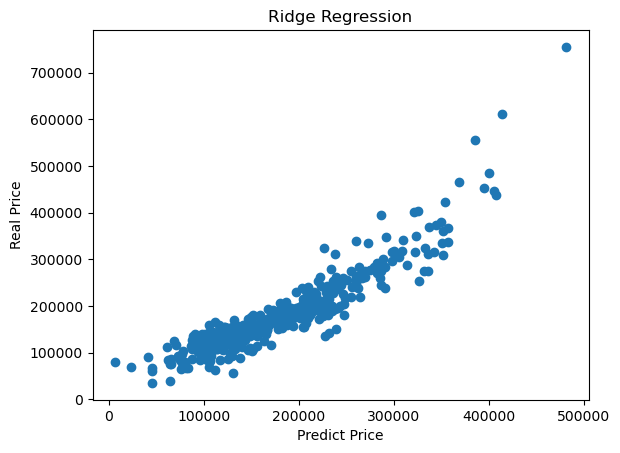

In [102]:
import matplotlib.pyplot as plt

if m==0:
    p = predict_lr
elif m==1:
    p = predict_r
else:
    p = predict_l
  
plt.scatter(p,test_y)
plt.xlabel('Predict Price')
plt.ylabel('Real Price')
plt.title('Ridge Regression')
plt.show()

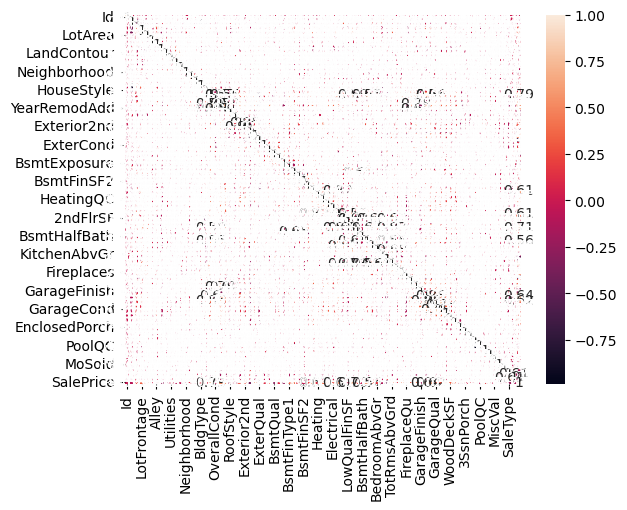

In [103]:
import seaborn as sns

correlation_matrix = df_fq.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [104]:
tail=[]
head=[]
correlation_matrix['SalePrice']=abs(correlation_matrix['SalePrice'])
index_tail=((correlation_matrix['SalePrice'].sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')).tail(5).index)
index_head=((correlation_matrix['SalePrice'].sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')).head(4).index)

for i in index_head:
    head.append(i)
for i in index_tail:
    tail.append(i)
tail.remove('SalePrice')


In [105]:
w = df_fq.loc[:,tail]
train_w, test_w, train_y, test_y = train_test_split(w,y , test_size = 0.3, random_state = 42)

#ridge
r = Ridge()
r.fit(train_w, train_y)
predict_r = r.predict(test_w)
result2 = mean_squared_error(test_y, predict_r)
print("最相關特徵MSE為:",result2,end = '\n')

最相關特徵MSE為: 1640722414.0803614


In [111]:
z = df_fq.loc[:,head]
train_z, test_z, train_y, test_y = train_test_split(z,y , test_size = 0.3, random_state = 42)

#ridge
r = Ridge()
r.fit(train_z, train_y)
predict_r = r.predict(test_z)
result3 = mean_squared_error(test_y, predict_r)
print("前四高特徵MSE為:",result2,end = '\n')
print("前四低特徵MSE為:",result3,end = '\n')
print("全部特徵MSE為:",min(result),end = '\n')

前四高特徵MSE為: 1640722414.0803614
前四低特徵MSE為: 7028082645.2798815
全部特徵MSE為: 1075472442.8594007


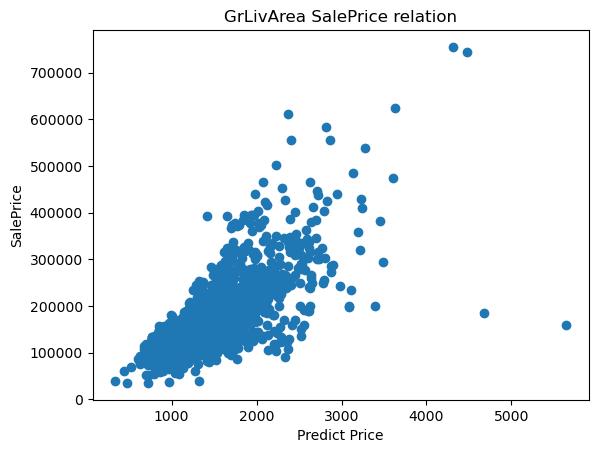

In [107]:
plt.scatter(df_fq['GrLivArea'],df_fq['SalePrice'])
plt.xlabel('Predict Price')
plt.ylabel('SalePrice')
plt.title('GrLivArea SalePrice relation')
plt.show()

In [110]:
#outliners判斷:數值標準化後絕對值>2的，就算outliners
import numpy as np
k = 0
for i in train_x.columns:
    if i != 'GrLivArea':
        k=k+1
    else:
        break

num = np.where(abs(trainScaler_x[k]>2))[0]

if len(num)!=0:
    for i in num:
        train_x2 = train_x.drop(i)
        train_y2 = train_y.drop(i)
else:
    train_x2 = train_x
    train_y2 = train_y
    
r.fit(train_x2, train_y2)
predict_gr = r.predict(test_x)
g_ridge = mean_squared_error(test_y, predict_gr)   
print(g_ridge)

1075061573.6912367
